In [15]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import _stop_words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import re

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

from time import time

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *textAnalysis* of **Data**

In [16]:
# Load the dataset
file_path = '/content/drive/MyDrive/Colab/NLP/Data/S08_question_answer_.txt'
df = pd.read_csv(file_path, delimiter='\t')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)
# Check for any missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())

First few rows of the dataset:
      ArticleTitle                                           Question Answer  \
0  Abraham_Lincoln  Was Abraham Lincoln the sixteenth President of...    yes   
1  Abraham_Lincoln  Was Abraham Lincoln the sixteenth President of...   Yes.   
2  Abraham_Lincoln  Did Lincoln sign the National Banking Act of 1...    yes   
3  Abraham_Lincoln  Did Lincoln sign the National Banking Act of 1...   Yes.   
4  Abraham_Lincoln                   Did his mother die of pneumonia?     no   

  DifficultyFromQuestioner DifficultyFromAnswerer  ArticleFile  
0                     easy                   easy  S08_set3_a4  
1                     easy                   easy  S08_set3_a4  
2                     easy                 medium  S08_set3_a4  
3                     easy                   easy  S08_set3_a4  
4                     easy                 medium  S08_set3_a4  

Shape of the dataset:
(1715, 6)

Missing values in the dataset:
ArticleTitle                  0
Q

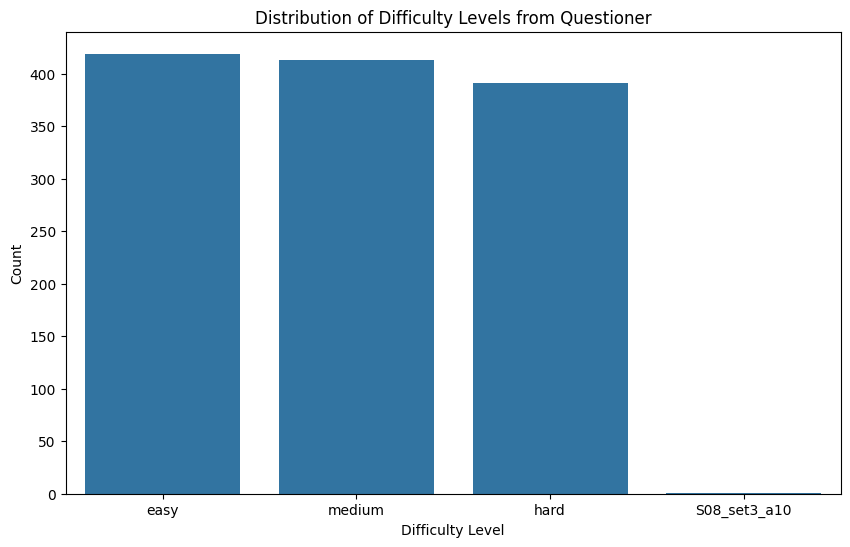

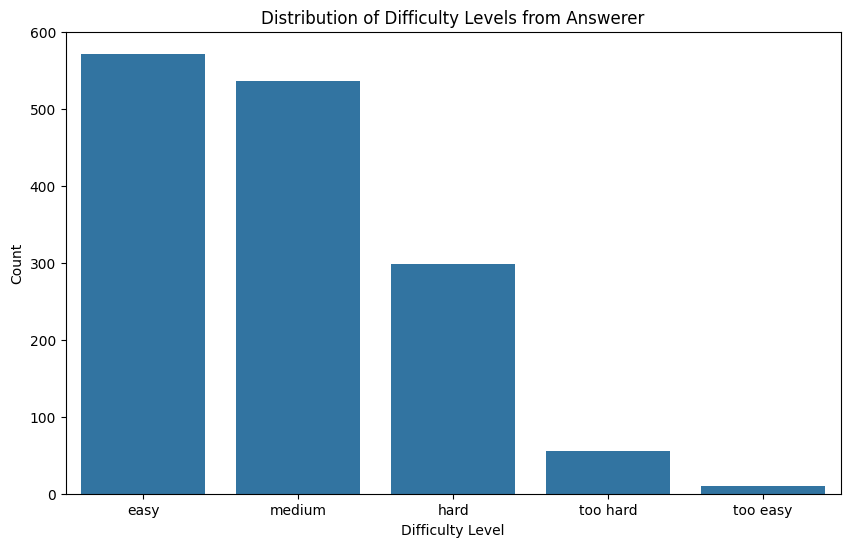

In [17]:

# Plot the distribution of difficulty levels from questioner
plt.figure(figsize=(10, 6))
sns.countplot(x='DifficultyFromQuestioner', data=df)
plt.title('Distribution of Difficulty Levels from Questioner')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

# Plot the distribution of difficulty levels from answerer
plt.figure(figsize=(10, 6))
sns.countplot(x='DifficultyFromAnswerer', data=df)
plt.title('Distribution of Difficulty Levels from Answerer')
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.show()

In [18]:
# Convert categorical labels to numerical labels
df['DifficultyFromQuestioner'] = df['DifficultyFromQuestioner'].astype('category').cat.codes
df['DifficultyFromAnswerer'] = df['DifficultyFromAnswerer'].astype('category').cat.codes

# Display the first few rows after label encoding
print("\nData after label encoding:")
print(df.head())


Data after label encoding:
      ArticleTitle                                           Question Answer  \
0  Abraham_Lincoln  Was Abraham Lincoln the sixteenth President of...    yes   
1  Abraham_Lincoln  Was Abraham Lincoln the sixteenth President of...   Yes.   
2  Abraham_Lincoln  Did Lincoln sign the National Banking Act of 1...    yes   
3  Abraham_Lincoln  Did Lincoln sign the National Banking Act of 1...   Yes.   
4  Abraham_Lincoln                   Did his mother die of pneumonia?     no   

   DifficultyFromQuestioner  DifficultyFromAnswerer  ArticleFile  
0                         1                       0  S08_set3_a4  
1                         1                       0  S08_set3_a4  
2                         1                       2  S08_set3_a4  
3                         1                       0  S08_set3_a4  
4                         1                       2  S08_set3_a4  



# **Text Preprocessing**


In [20]:
# Tokenization
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

# Download the punkt tokenizer
nltk.download('punkt')
nltk.download('punkt_tab')

# Ensure 'Question' and 'Answer' columns contain string data
df['Question'] = df['Question'].astype(str)
df['Answer'] = df['Answer'].astype(str)

# Tokenization
df['Question_Tokens'] = df['Question'].apply(word_tokenize)
df['Answer_Tokens'] = df['Answer'].apply(word_tokenize)

print("Tokenization Output:")
print(df[['Question', 'Question_Tokens']].head())
print(df[['Answer', 'Answer_Tokens']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenization Output:
                                            Question  \
0  Was Abraham Lincoln the sixteenth President of...   
1  Was Abraham Lincoln the sixteenth President of...   
2  Did Lincoln sign the National Banking Act of 1...   
3  Did Lincoln sign the National Banking Act of 1...   
4                   Did his mother die of pneumonia?   

                                     Question_Tokens  
0  [Was, Abraham, Lincoln, the, sixteenth, Presid...  
1  [Was, Abraham, Lincoln, the, sixteenth, Presid...  
2  [Did, Lincoln, sign, the, National, Banking, A...  
3  [Did, Lincoln, sign, the, National, Banking, A...  
4          [Did, his, mother, die, of, pneumonia, ?]  
  Answer Answer_Tokens
0    yes         [yes]
1   Yes.      [Yes, .]
2    yes         [yes]
3   Yes.      [Yes, .]
4     no          [no]


In [21]:
# Stemming
from nltk.stem import PorterStemmer

# Stemming
stemmer = PorterStemmer()
df['Question_Stems'] = df['Question_Tokens'].apply(lambda x: [stemmer.stem(word) for word in x])
df['Answer_Stems'] = df['Answer_Tokens'].apply(lambda x: [stemmer.stem(word) for word in x])

print("Stemming Output:")
print(df[['Question', 'Question_Stems']].head())
print(df[['Answer', 'Answer_Stems']].head())

Stemming Output:
                                            Question  \
0  Was Abraham Lincoln the sixteenth President of...   
1  Was Abraham Lincoln the sixteenth President of...   
2  Did Lincoln sign the National Banking Act of 1...   
3  Did Lincoln sign the National Banking Act of 1...   
4                   Did his mother die of pneumonia?   

                                      Question_Stems  
0  [wa, abraham, lincoln, the, sixteenth, presid,...  
1  [wa, abraham, lincoln, the, sixteenth, presid,...  
2  [did, lincoln, sign, the, nation, bank, act, o...  
3  [did, lincoln, sign, the, nation, bank, act, o...  
4           [did, hi, mother, die, of, pneumonia, ?]  
  Answer Answer_Stems
0    yes         [ye]
1   Yes.      [ye, .]
2    yes         [ye]
3   Yes.      [ye, .]
4     no         [no]


In [22]:
# Lemmatization
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data files
nltk.download('wordnet')

# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Question_Lemmas'] = df['Question_Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df['Answer_Lemmas'] = df['Answer_Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

print("Lemmatization Output:")
print(df[['Question', 'Question_Lemmas']].head())
print(df[['Answer', 'Answer_Lemmas']].head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Lemmatization Output:
                                            Question  \
0  Was Abraham Lincoln the sixteenth President of...   
1  Was Abraham Lincoln the sixteenth President of...   
2  Did Lincoln sign the National Banking Act of 1...   
3  Did Lincoln sign the National Banking Act of 1...   
4                   Did his mother die of pneumonia?   

                                     Question_Lemmas  
0  [Was, Abraham, Lincoln, the, sixteenth, Presid...  
1  [Was, Abraham, Lincoln, the, sixteenth, Presid...  
2  [Did, Lincoln, sign, the, National, Banking, A...  
3  [Did, Lincoln, sign, the, National, Banking, A...  
4          [Did, his, mother, die, of, pneumonia, ?]  
  Answer Answer_Lemmas
0    yes         [yes]
1   Yes.      [Yes, .]
2    yes         [yes]
3   Yes.      [Yes, .]
4     no          [no]


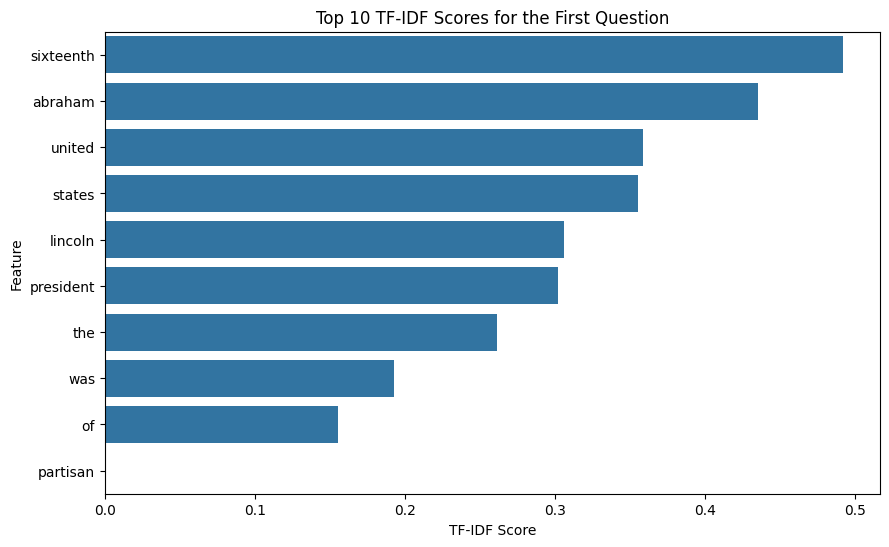

In [23]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Question'])

# Visualize the TF-IDF scores for the first question
tfidf_scores = tfidf_matrix[0].toarray().flatten()
tfidf_features = tfidf_vectorizer.get_feature_names_out()

tfidf_df = pd.DataFrame({'Feature': tfidf_features, 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF Score', y='Feature', data=tfidf_df)
plt.title('Top 10 TF-IDF Scores for the First Question')
plt.show()

### **Text Representation**

In [26]:
# POS Tagging
from nltk.tokenize import word_tokenize
from nltk import pos_tag

# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

# Ensure 'Question' and 'Answer' columns contain string data
df['Question'] = df['Question'].astype(str)
df['Answer'] = df['Answer'].astype(str)

# POS Tagging
df['Question_POS'] = df['Question'].apply(lambda x: pos_tag(word_tokenize(x)))
df['Answer_POS'] = df['Answer'].apply(lambda x: pos_tag(word_tokenize(x)))

print("POS Tagging Output:")
print(df[['Question', 'Question_POS']].head())
print(df[['Answer', 'Answer_POS']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


POS Tagging Output:
                                            Question  \
0  Was Abraham Lincoln the sixteenth President of...   
1  Was Abraham Lincoln the sixteenth President of...   
2  Did Lincoln sign the National Banking Act of 1...   
3  Did Lincoln sign the National Banking Act of 1...   
4                   Did his mother die of pneumonia?   

                                        Question_POS  
0  [(Was, NNP), (Abraham, NNP), (Lincoln, NNP), (...  
1  [(Was, NNP), (Abraham, NNP), (Lincoln, NNP), (...  
2  [(Did, NNP), (Lincoln, NNP), (sign, VB), (the,...  
3  [(Did, NNP), (Lincoln, NNP), (sign, VB), (the,...  
4  [(Did, NNP), (his, PRP$), (mother, NN), (die, ...  
  Answer           Answer_POS
0    yes         [(yes, NNS)]
1   Yes.  [(Yes, UH), (., .)]
2    yes         [(yes, NNS)]
3   Yes.  [(Yes, UH), (., .)]
4     no           [(no, DT)]


Bag of Words Matrix Shape:
(1715, 2530)


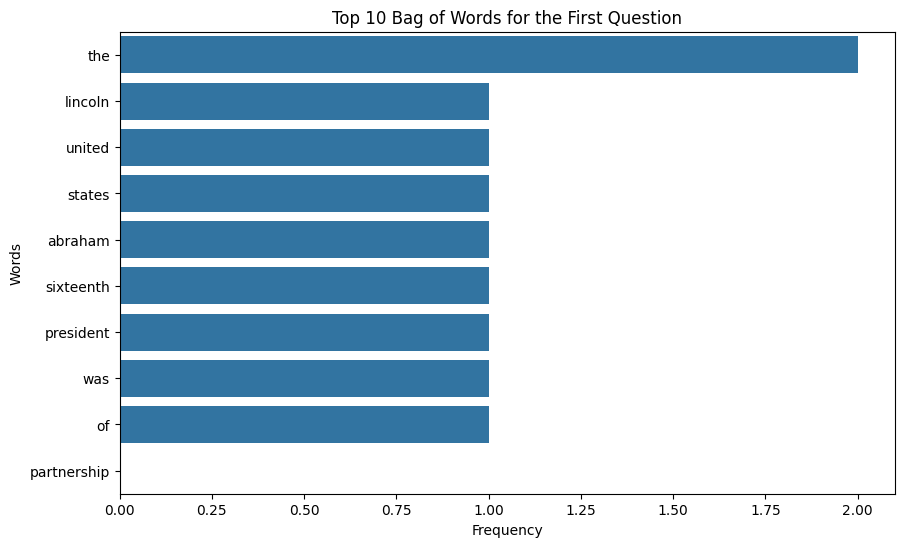

In [31]:
#Bag of Words Technique
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Question' column contains string data
df['Question'] = df['Question'].astype(str)

# Bag of Words (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(df['Question'])

print("Bag of Words Matrix Shape:")
print(bow_matrix.shape)

# Visualize the Bag of Words for the first question
bow_features = vectorizer.get_feature_names_out()
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_features)

# Select top 10 words by frequency for the first question
top_n = 10
first_question_bow = bow_df.iloc[0]
top_words = first_question_bow.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('Top 10 Bag of Words for the First Question')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

N Grams Matrix Shape:
(1715, 8318)


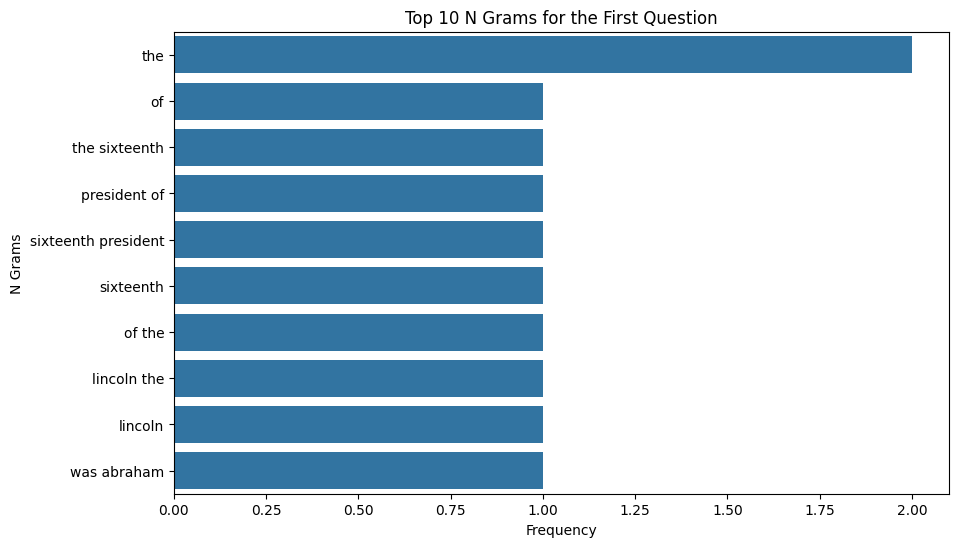

In [34]:
# N Grams
from sklearn.feature_extraction.text import CountVectorizer

# Ensure 'Question' column contains string data
df['Question'] = df['Question'].astype(str)

# N Grams
vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2))
ngrams_matrix = vectorizer_ngrams.fit_transform(df['Question'])

print("N Grams Matrix Shape:")
print(ngrams_matrix.shape)

# Visualize the N Grams for the first question
ngrams_features = vectorizer_ngrams.get_feature_names_out()
ngrams_df = pd.DataFrame(ngrams_matrix.toarray(), columns=ngrams_features)

# Select top 10 n-grams by frequency for the first question
top_n = 10
first_question_ngrams = ngrams_df.iloc[0]
top_ngrams = first_question_ngrams.sort_values(ascending=False).head(top_n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_ngrams.values, y=top_ngrams.index)
plt.title('Top 10 N Grams for the First Question')
plt.xlabel('Frequency')
plt.ylabel('N Grams')
plt.show()

# **Text Classification**

# **1.	Multinomial Naive Bayes**

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        95
           2       0.66      0.79      0.72        77
           3       0.78      0.67      0.72        85
           4       0.77      0.80      0.78        86

    accuracy                           0.74       343
   macro avg       0.74      0.74      0.74       343
weighted avg       0.74      0.74      0.74       343

Confusion Matrix:
[[66 13  8  8]
 [ 9 61  5  2]
 [ 9  8 57 11]
 [ 4 10  3 69]]
Accuracy Score: 0.7376093294460642


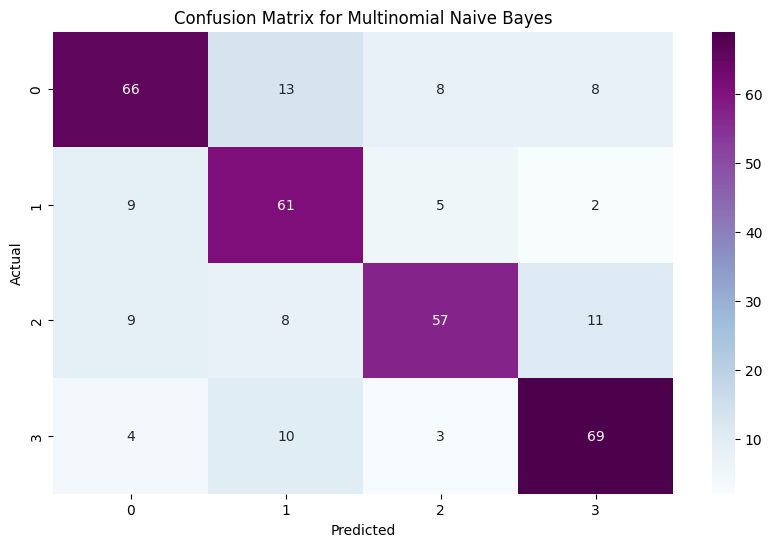

In [42]:
# Ensure 'Question' column contains string data
df['Question'] = df['Question'].astype(str)

# Text Representation using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['Question'])

# Using 'DifficultyFromQuestioner' as the target variable for classification
y = df['DifficultyFromQuestioner'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluation and Visualization

# Multinomial Naive Bayes Evaluation
print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("Accuracy Score:", accuracy_score(y_test, y_pred_nb))

# Confusion Matrix Visualization for Multinomial Naive Bayes
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='BuPu')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **2.	Logistic Regression**


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.79      0.79        95
           2       0.69      0.88      0.78        77
           3       0.85      0.75      0.80        85
           4       0.88      0.76      0.81        86

    accuracy                           0.79       343
   macro avg       0.80      0.80      0.79       343
weighted avg       0.80      0.79      0.79       343

Confusion Matrix:
[[75 14  5  1]
 [ 8 68  0  1]
 [ 5  9 64  7]
 [ 8  7  6 65]]
Accuracy Score: 0.793002915451895


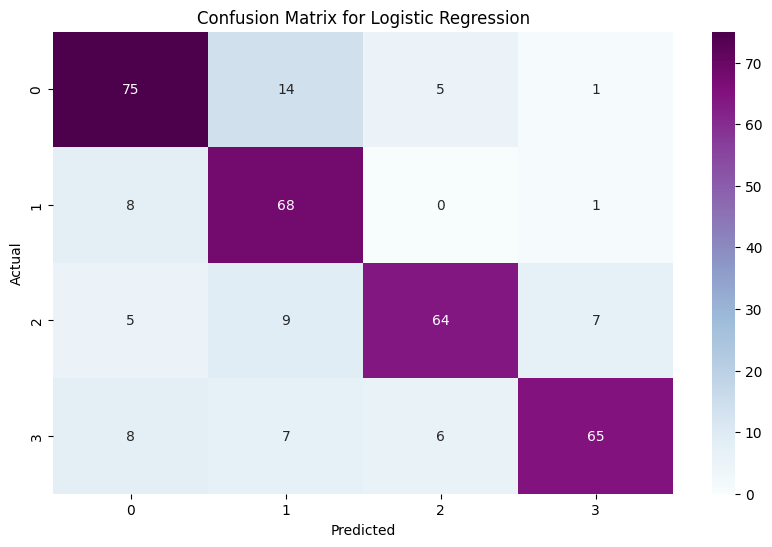

In [44]:
from sklearn.linear_model import LogisticRegression

# Model 2: Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation and Visualization

# Logistic Regression Evaluation
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))

# Confusion Matrix Visualization for Logistic Regression
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='BuPu')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **ROC Curve and AUC**

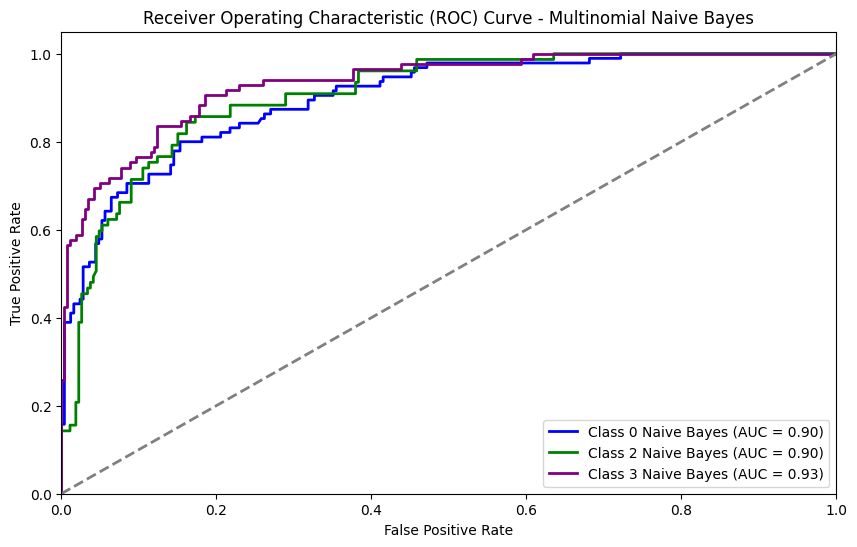

In [68]:
# ROC Curve and AUC for Multinomial Naive Bayes
fpr_nb = dict()
tpr_nb = dict()
roc_auc_nb = dict()

for i in range(y_test_bin.shape[1]):
    if len(set(y_test_bin[:, i])) > 1:  # Check if there are at least two classes present
        fpr_nb[i], tpr_nb[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_nb[:, i])
        roc_auc_nb[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba_nb[:, i])

# Plot ROC curves for Multinomial Naive Bayes
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple']
for i in range(y_test_bin.shape[1]):
    if i in fpr_nb:
        plt.plot(fpr_nb[i], tpr_nb[i], color=colors[i], lw=2, label=f'Class {i} Naive Bayes (AUC = {roc_auc_nb[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multinomial Naive Bayes')
plt.legend(loc="lower right")
plt.show()

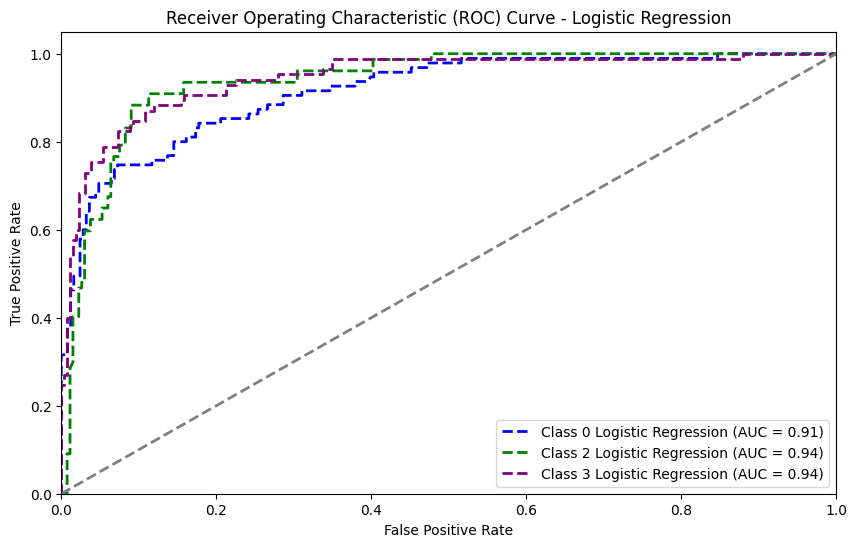

In [69]:
# ROC Curve and AUC for Logistic Regression
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()

for i in range(y_test_bin.shape[1]):
    if len(set(y_test_bin[:, i])) > 1:  # Check if there are at least two classes present
        fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba_lr[:, i])
        roc_auc_lr[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba_lr[:, i])

# Plot ROC curves for Logistic Regression
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'purple']
for i in range(y_test_bin.shape[1]):
    if i in fpr_lr:
        plt.plot(fpr_lr[i], tpr_lr[i], color=colors[i], lw=2, linestyle='--', label=f'Class {i} Logistic Regression (AUC = {roc_auc_lr[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()